In [202]:
pip install numpy opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import math



array([4, 6, 8])

In [5]:
def haversine(coord1: object, coord2: object):
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    return round(meters, 10)

In [31]:
haversine(
    (41.49008, -71.312796),
    (41.499498, -81.695391)
)

1154491.9115063278

In [6]:
def rotate(vec, angl):
    vec = np.array(vec)
    roll, pitch, yaw = angl
    
    sf, cf = np.sin(roll), np.cos(roll) # x
    st, ct = np.sin(pitch), np.cos(pitch) # y
    sp, cp = np.sin(yaw), np.cos(yaw) # z
    
    sf, cf, st, ct, sp, cp = np.round([sf, cf, st, ct, sp, cp], 10)
    
    Rx = np.array([
        [1, 0,   0],
        [0, cf, -sf],
        [0, sf,  cf],
    ])
    
    Ry = np.array([
        [ct,  0, st],
        [0,   1, 0],
        [-st, 0, ct],
    ])
    
    Rz = np.array([
        [cp, -sp,  0],
        [sp,  cp,  0],
        [0,   0,   1],
    ])
    
    R = np.matmul(Rz, Ry, Rx)
    return np.matmul(R, vec)
     
    
    

In [357]:
rotate([1, 1, 1], [np.pi/2, np.pi/4, 0])

array([1.41421356, 1.        , 0.        ])

In [7]:
def trajectory(NED, v, u):
    # NED: angles, pos
    points = []
    
    grav = np.array([0, 0, -1])
    
    angl, pos = NED
    
    v = rotate(v, (-a for a in angl))
    u = rotate(u, (-a for a in angl))
    v[2] = -v[2]
    u[2] = -u[2]

    
    while pos[2] > 0:
        pos += (v + u + grav)
        points.append(pos)
    
    return points

trajectory( ((0, 0, 0), (0,0,10)), (1, 0, 0.5), (0, 0, 0))

[array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5]),
 array([ 7. ,  0. , -0.5])]

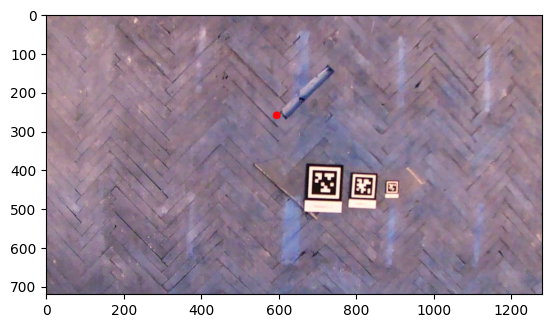

In [8]:


camera_matrix = np.matrix([
    [1755.4404327456236, 0.0, 595.6112275444069],
    [0.0, 1749.757170404926, 260.79397620261625],
    [0.0, 0.0, 1.0]
], dtype=float)

distortion = np.matrix([-0.5764957531612058,
                        0.14426635118776,
                        0.016044965988848164,
                        0.005708590283968032,
                        0.9749205574691415])

# це матриця повороту і вектор зміщення для камери. Вони нам не потрібні, тому тривіальні
rvec = np.eye(3)
tvec = np.array([[0, 0, 0]], dtype=float)

# координати (х,у,z) відносно центру зображення, де z -- це глибина
# object_points = np.array([[0, 0, 0], [1, 0, 5], [0, 1, 5]], dtype=float)
object_points = np.array(trajectory(((np.pi, np.pi/2, 0), (0, 0, 10)), (0.1, 0, 0), (0.0, 0.0, 0)), dtype=float)

# спроектувати точки на фотографію
t_arr, _ = cv2.projectPoints(object_points, rvec, tvec, camera_matrix, distortion)

img = cv2.imread('image_1668.png')

for t in t_arr[:-1]:
    t = t.flatten()
    img = cv2.circle(img, center=(int(t[0]), int(t[1])), radius=10,
                     color=(255, 5, 10), thickness=-1)
plt.imshow(img)
plt.show()



KeyboardInterrupt: 